# A. Import Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# B. Import Datasets

In [2]:
data_15 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2015.csv", index_col=False)
data_16 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2016.csv", index_col=False)
data_17 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2017.csv", index_col=False)
data_18 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2018.csv", index_col=False)
data_19 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2019.csv", index_col=False)

# C. Data Cleansing

## Adjusting columns

In [3]:
# Taking specific columns for 2015 to 2017

data_15 = data_15[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
data_16 = data_16[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
data_17 = data_17[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']]

In [4]:
# Reordering columns for 2018 and 2019

data_18 = data_18[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
data_19 = data_19[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [5]:
# Renaming columns so they all match

column_titles = ['Country or Region', 'Rank', 'Happiness Score', 'Economy', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Perception of Corruption']

data_15.columns = column_titles
data_16.columns = column_titles
data_17.columns = column_titles
data_18.columns = column_titles
data_19.columns = column_titles

## Combine Dataframes

In [6]:
# Adding Year column for each dataframe

data_15['Year'] = 2015
data_16['Year'] = 2016
data_17['Year'] = 2017
data_18['Year'] = 2018
data_19['Year'] = 2019

In [7]:
# Making one dataframe  to include all the years

data = pd.concat([data_15, data_16, data_17, data_18, data_19]).reset_index(drop=True)

## Missing Values

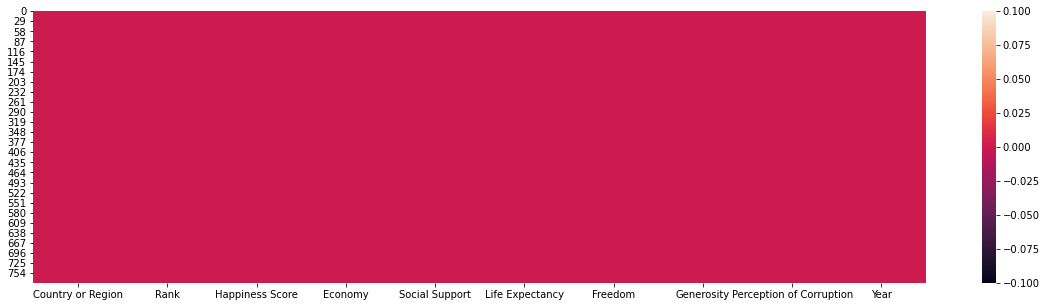

In [8]:
# Double checking for missing values

sns.heatmap(data = data.isna())

# D. Analysis

## Summary

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Region         782 non-null    object 
 1   Rank                      782 non-null    int64  
 2   Happiness Score           782 non-null    float64
 3   Economy                   782 non-null    float64
 4   Social Support            782 non-null    float64
 5   Life Expectancy           782 non-null    float64
 6   Freedom                   782 non-null    float64
 7   Generosity                782 non-null    float64
 8   Perception of Corruption  782 non-null    float64
 9   Year                      782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [10]:
# For all five years 

data.describe()

,Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125275,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105844,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.090905,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


## Mean

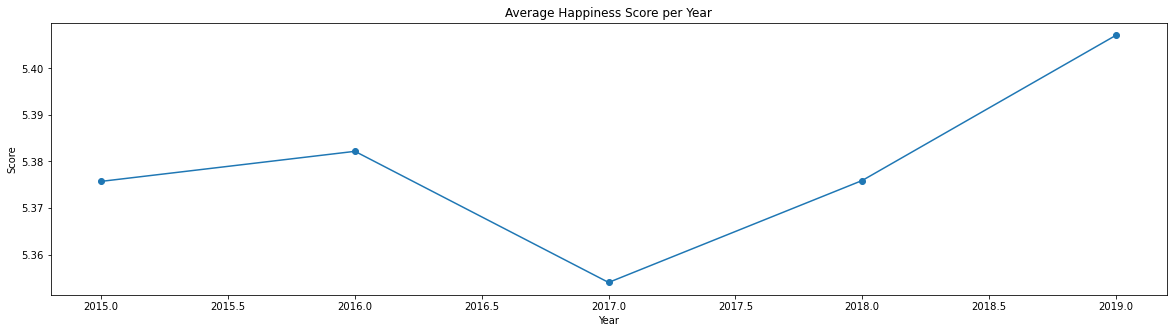

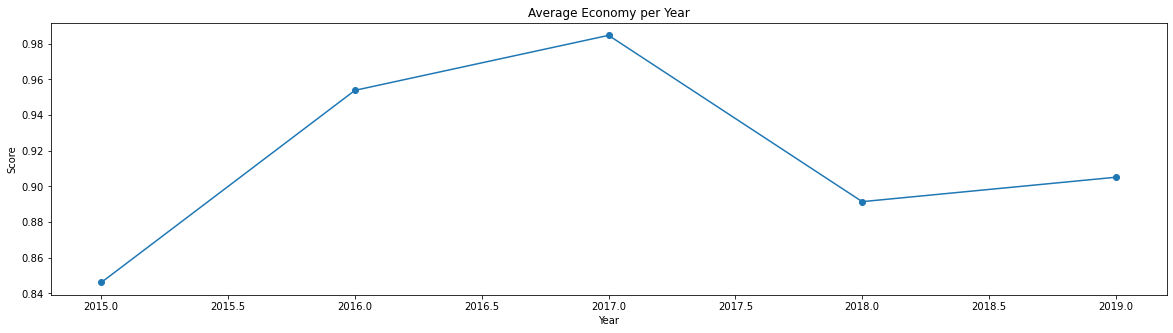

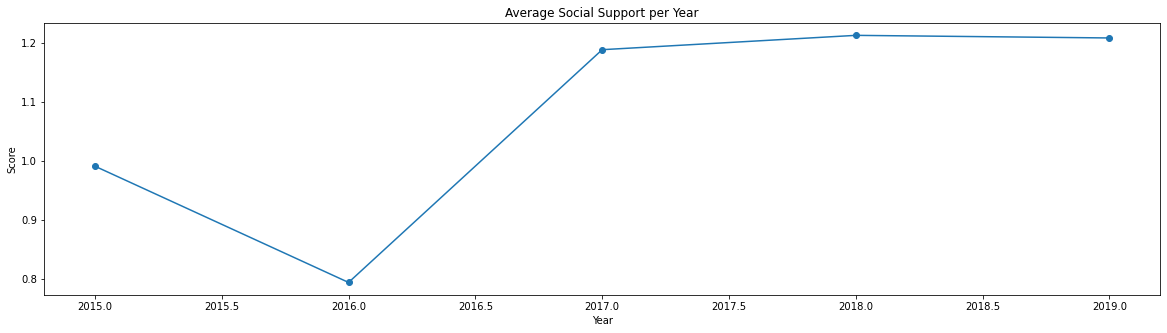

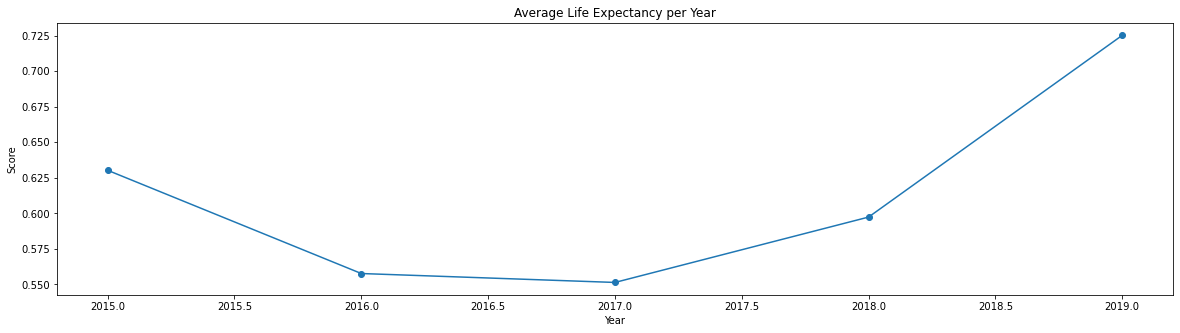

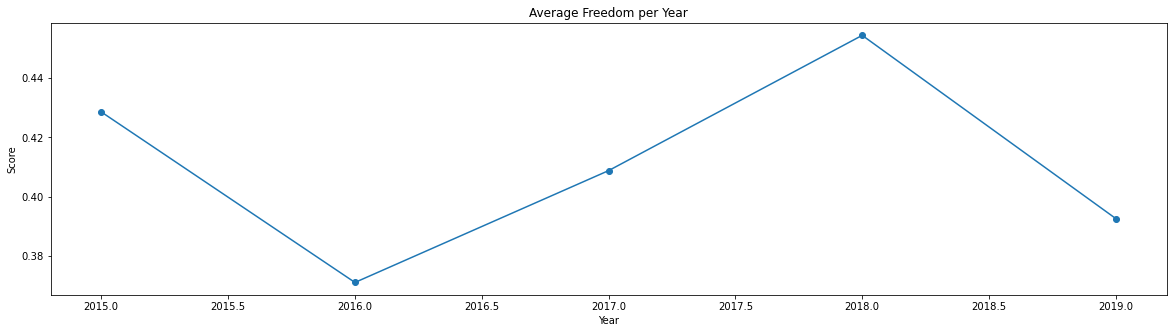

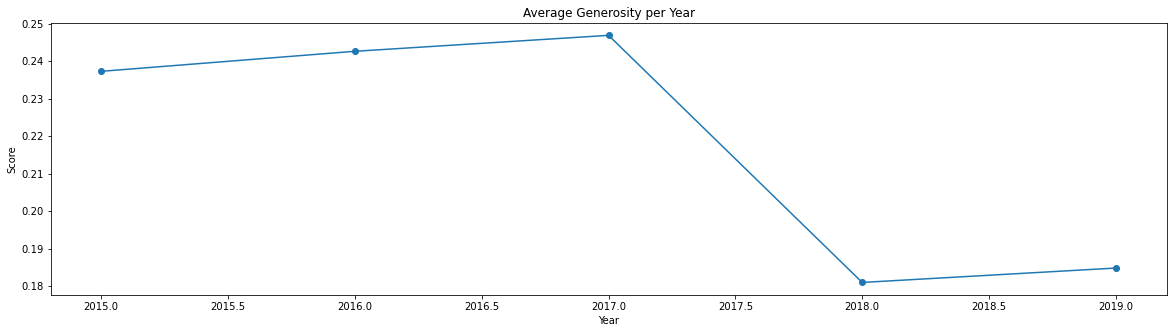

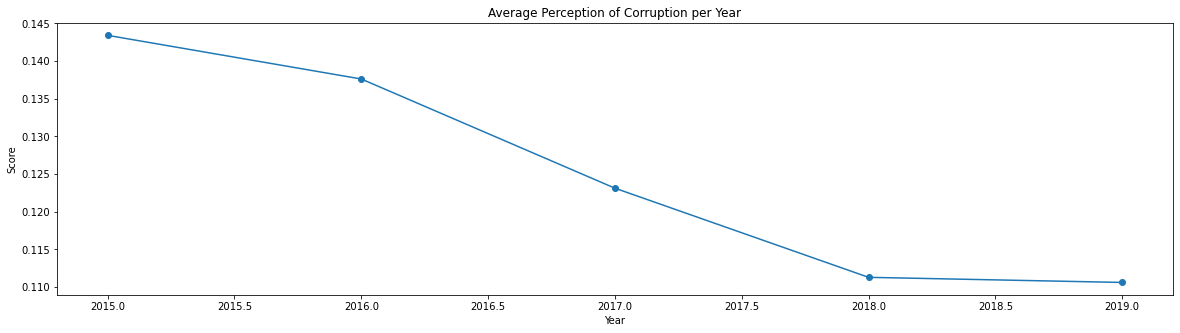

In [11]:
# Grouped by year 

for column in data:
     if column != 'Country or Region' and column != 'Rank' and column != 'Year':
        variable = data.groupby(by='Year')[column].mean() 
        fig = plt.subplots()
        plt.plot(variable, marker='o')
        plt.xlabel('Year')
        plt.ylabel('Score')
        plt.title(f'Average {column} per Year')

For the most part, all variables are following a trend across all five years. In approximately one out of the five points for each variable, there is one that does not follow the trend. 
- Happiness scores increase but dips in 2017.
- Economy increases but dips in 2018.
- Social support increases but dips in 2016.
- Life expectancy dips in 2016 and 2017 but increases in following years. 
- Freedom increases but dips in 2016 and 2019.
- Generosity increases but dips in 2018. 

## Correlation

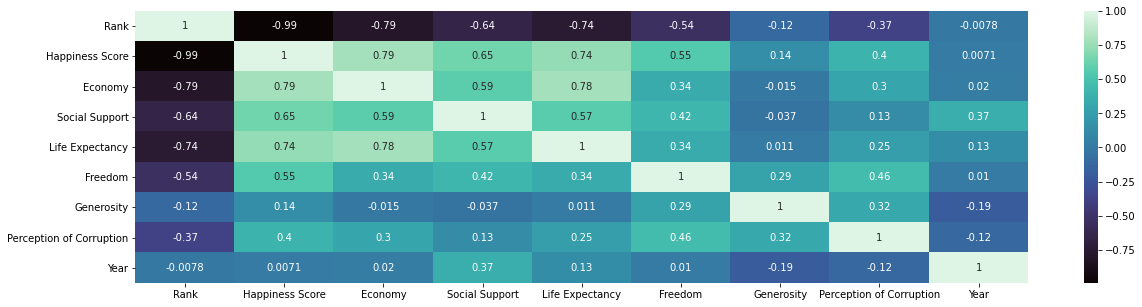

In [12]:
# Creating a heatmap of correlations

corr_data = data.corr()

sns.heatmap(corr_data, annot=True, cmap="mako")

                          Happiness Score
Economy                          0.789284
Life Expectancy                  0.742456
Social Support                   0.648799
Freedom                          0.551258
Perception of Corruption         0.395792
Generosity                       0.137578


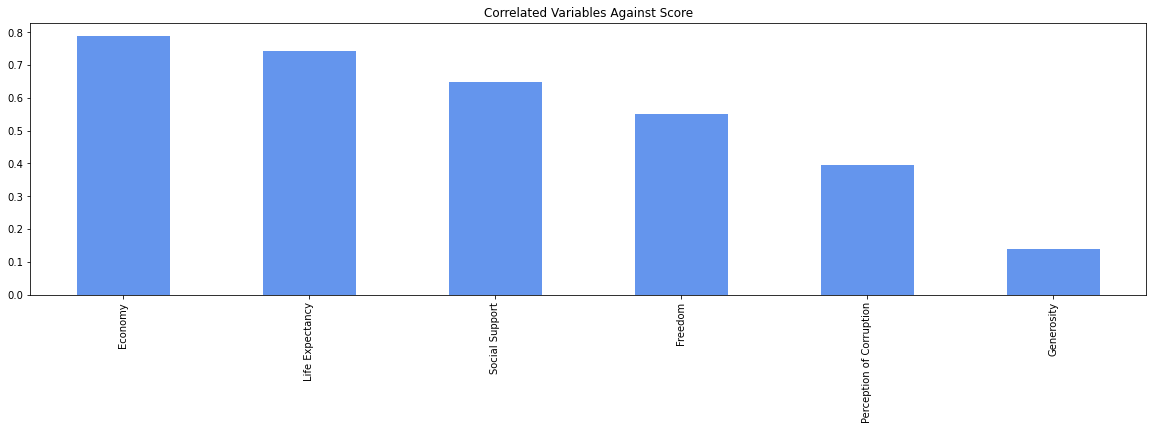

In [13]:
# Finding variables with the highest correlation to score

score_corr_col = corr_data[['Happiness Score']].sort_values('Happiness Score', ascending=False)
score_corr = score_corr_col.loc[['Economy', 'Life Expectancy', 'Social Support', 'Freedom', 'Perception of Corruption', 'Generosity']]

# Barplot of correlated variables against score 

score_corr.plot(kind='bar', legend=None, color='cornflowerblue')
plt.title('Correlated Variables Against Score')

print(score_corr)

- Economy and life expectancy show the strongest postive correlations to happiness score with coefficients over 0.700 while generosity shows the weakest positive correlation with a coefficient of 0.138.

Text(0.5, 1.0, 'Happiness Score vs Generosity')

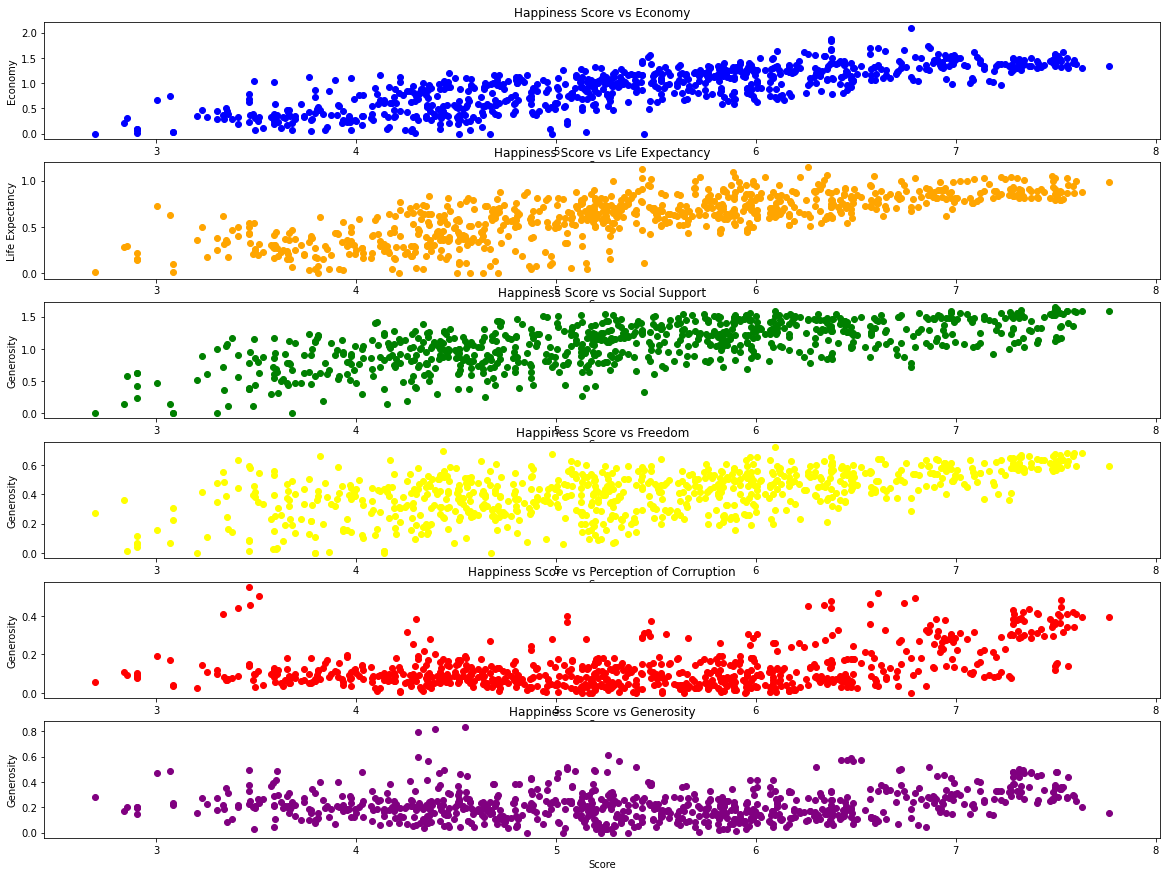

In [14]:
plt.figure(figsize=(20, 15))

plt.subplot(6, 1, 1)
plt.scatter(data['Happiness Score'], data['Economy'], color='blue')
plt.xlabel('Score')
plt.ylabel('Economy')
plt.title('Happiness Score vs Economy')

plt.subplot(6, 1, 2)
plt.scatter(data['Happiness Score'], data['Life Expectancy'], color='orange')
plt.xlabel('Score')
plt.ylabel('Life Expectancy')
plt.title('Happiness Score vs Life Expectancy')

plt.subplot(6, 1, 3)
plt.scatter(data['Happiness Score'], data['Social Support'], color='green')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.title('Happiness Score vs Social Support')

plt.subplot(6, 1, 4)
plt.scatter(data['Happiness Score'], data['Freedom'], color='yellow')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.title('Happiness Score vs Freedom')

plt.subplot(6, 1, 5)
plt.scatter(data['Happiness Score'], data['Perception of Corruption'], color='red')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.title('Happiness Score vs Perception of Corruption')

plt.subplot(6, 1, 6)
plt.scatter(data['Happiness Score'], data['Generosity'], color='purple')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.title('Happiness Score vs Generosity')

- In a visual display, we can clearly see the trend line for economy and life expectancy are increasing as happiness scores increase. 
- It is more difficult to see a positive correlation for generosity and happiness scores. Most of the points are along a horizontal line. 

## Top and Bottom Ten Countries

Text(0.5, 1.0, 'Top Ten Happiest Countries')

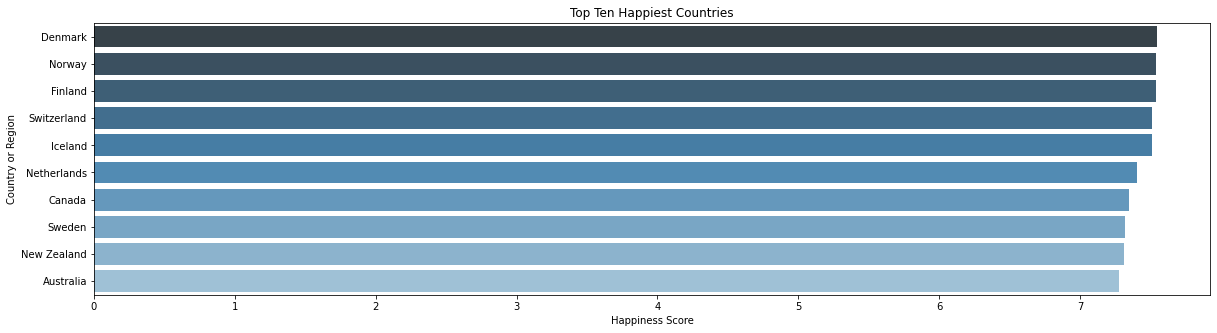

In [17]:
# Top 10 Happiest Countries by Averages

top_ten_19 = data.groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
top_ten_19 = top_ten_19.sort_values('Happiness Score', ascending=False).head(10)

sns.barplot(x='Happiness Score', y='Country or Region', data=top_ten_19, palette="Blues_d")
plt.title('Top Ten Happiest Countries')

Text(0.5, 1.0, 'Top Ten Happiest Countries in 2019')

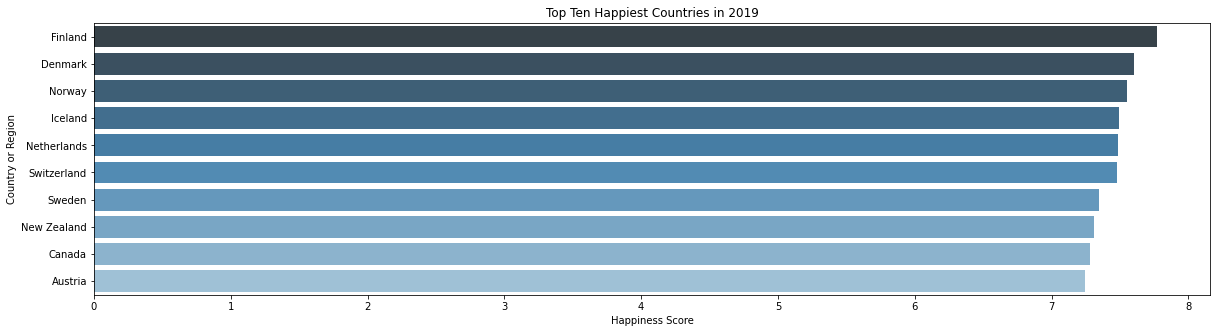

In [15]:
# Top 10 Happiest Countries in 2019

top_ten_19 = data[data['Year']==2019].groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
top_ten_19 = top_ten_19.sort_values('Happiness Score', ascending=False).head(10)

sns.barplot(x='Happiness Score', y='Country or Region', data=top_ten_19, palette="Blues_d")
plt.title('Top Ten Happiest Countries in 2019')

- The happiest countries in the world are traditional, developed, Western countries. Eight out of ten are located in Europe. 
- There was only one country, Australia, with an averaged happiness score in the top ten that did not place in the top ten ranks in 2019.

Text(0.5, 1.0, 'Ten Least Happiest Countries')

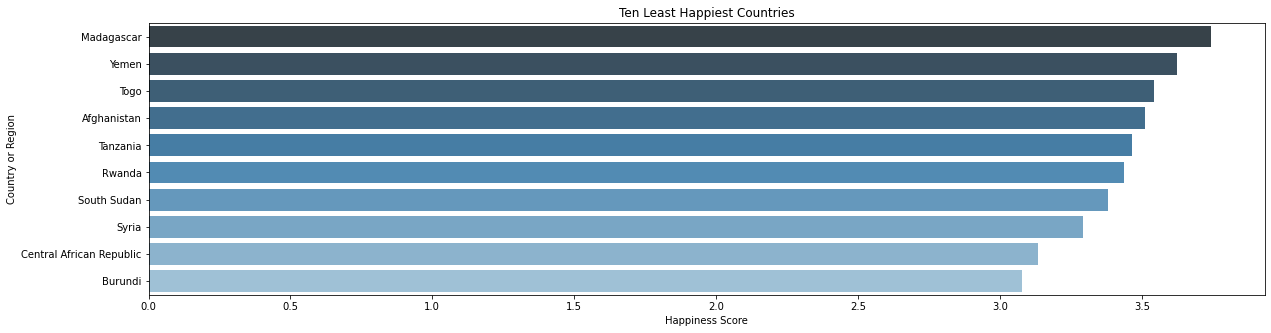

In [18]:
# 10 Least Happiest Countries on Average

bottom_ten_19 = data.groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score').head(10)
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score', ascending=False)

sns.barplot(x='Happiness Score', y='Country or Region', data=bottom_ten_19, palette="Blues_d")
plt.title('Ten Least Happiest Countries')

Text(0.5, 1.0, 'Ten Least Happiest Countries in 2019')

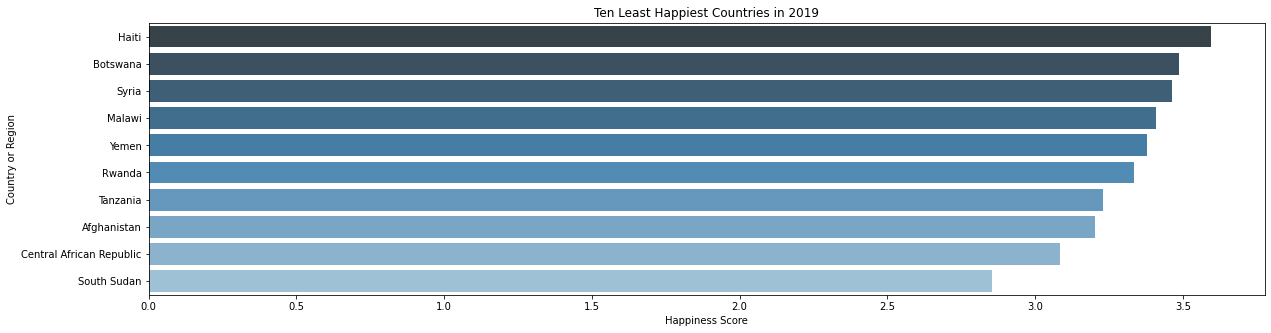

In [53]:
# 10 Least Happiest Countries in 2019

bottom_ten_19 = data[data['Year']==2019].groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score').head(10)
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score', ascending=False)

sns.barplot(x='Happiness Score', y='Country or Region', data=bottom_ten_19, palette="Blues_d")
plt.title('Ten Least Happiest Countries in 2019')

- The least happiest countries are countries that are less developed, war zones, or have sufferred natural disasters. 
- There is more movement in the unhappiest countries. Three countries, Haiti, Botswana, and Malawai, were in the ten lowest ranks despite not have the lowest averaged scores. 

## Regression

In [131]:
# Ordinary Least Square Regression Model with full data set

X = data[['Economy', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Perception of Corruption']]
Y = data[['Happiness Score']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     418.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          4.88e-239
Time:                        15:47:19   Log-Likelihood:                -638.44
No. Observations:                 782   AIC:                             1291.
Df Residuals:                     775   BIC:                             1324.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- The r squared and adjusted r squared are 0.760+ which indicate this model is a good fit. We can predict a country's happiness score with 76% accuracy.

In [132]:
# Predicting happiness scores

model_predictions = model.predict(X).to_frame()
model_predictions.columns = ['Predicted Happiness Score']

data_with_predictions = data.join(model_predictions).sort_values('Predicted Happiness Score', ascending=False)

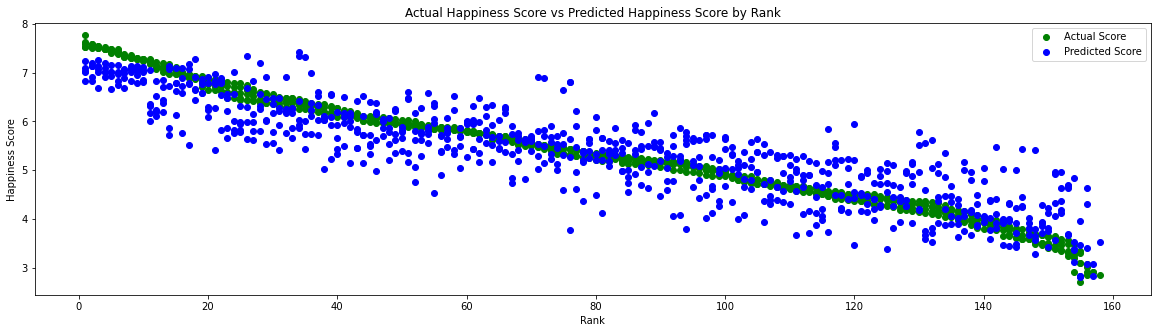

In [130]:
#Validating Predictions 

fig, ax = plt.subplots()

plt.scatter(data_with_predictions['Rank'], data_with_predictions['Happiness Score'], label='Actual Score', color='green')
plt.xlabel('Rank')
plt.ylabel('Happiness Score')

plt.scatter(data_with_predictions['Rank'], data_with_predictions['Predicted Happiness Score'], label='Predicted Score', color='blue')
plt.xlabel('Rank')
plt.ylabel('Happiness Score')

plt.title('Actual Happiness Score vs Predicted Happiness Score by Rank')
ax.legend()

- While the actual scores are in a straight line, the predicted scores are roughly scatterred around the actual country scores. 

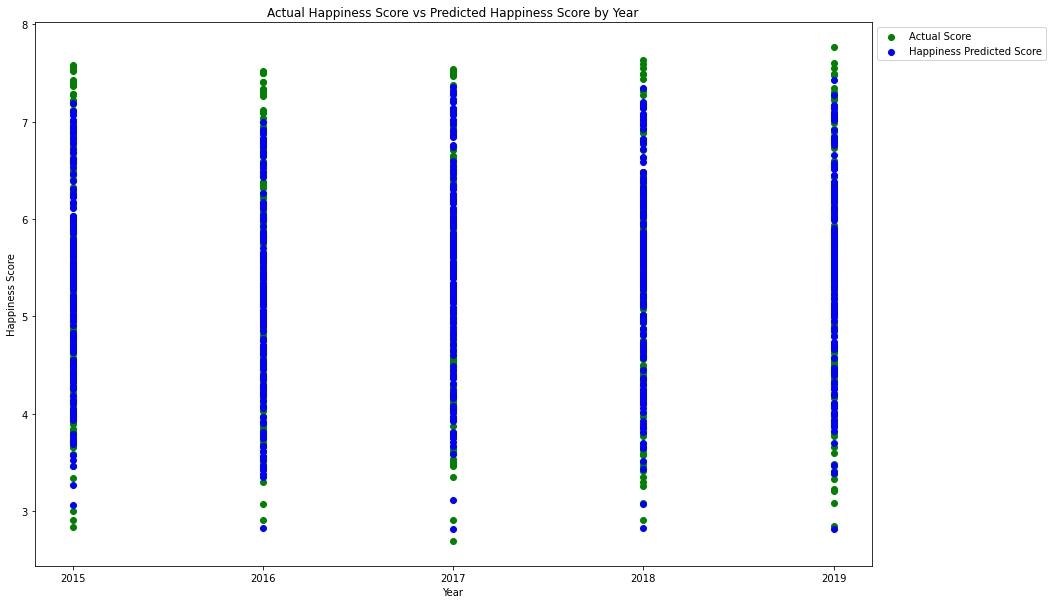

In [126]:
# Validating Predictions

ticks= [2015, 2016, 2017, 2018, 2019]
years = [2015, 2016, 2017, 2018, 2019]

plt.figure(figsize=(15,10))
plt.scatter(x=data['Year'], y=data['Happiness Score'], label='Actual Score', color='green') # original
plt.scatter(x=data['Year'],y=model_predictions, label='Happiness Predicted Score', color='blue') # predicted
plt.legend(bbox_to_anchor=(1,1), loc="best")
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Actual Happiness Score vs Predicted Happiness Score by Year')
plt.xticks(years, ticks)
plt.show()

- Again, the predicted scores are plotted around the actual scores but it does show that the actual scores seem to have a larger range than the predicted scores each year. 

Text(0.5, 0, 'Index')

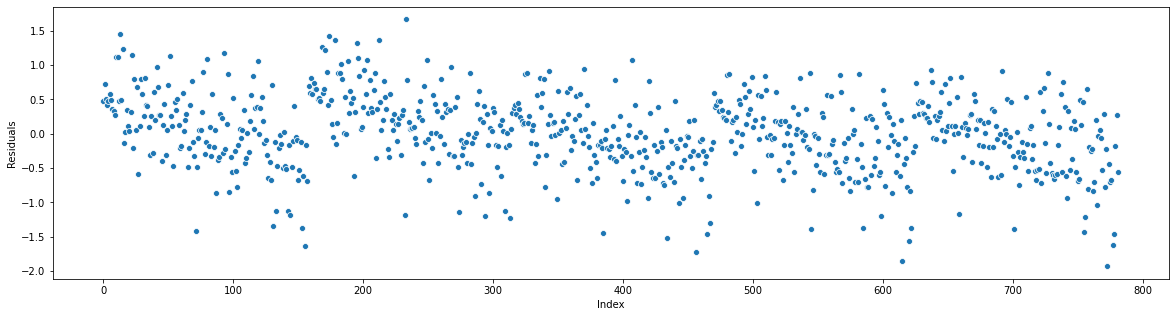

In [133]:
# Observing the Residuals

residuals = data.copy()
residuals['Predicted'] = model_all_predictions
residuals['Residuals'] = residuals['Happiness Score'] - residuals['Predicted']

sns.scatterplot(x=residuals.index, y = residuals['Residuals'], x_jitter=0.2, y_jitter=0.2)
plt.xlabel('Index')

- The residuals are roughly spaced around the horizontal axis indicating the model is a good fit. There seems to be a repeating pattern for indexes (roughly) between every 150 ticks and this is due to the groupings between the years. 

## Conclusion

- The countries that are currently the happiest in the world are likely to stay the happiest. There is little to no movement in five years of new countries in the top ten. 
- The keys to a country's happiness to mainly focused on economy, life expectancy, and social support. 
- In addition to those variable scores, we can use the scores from 0freedom, perception of corruption, and generosity to predict a country's happiness score with 76% accuracy. 